In [12]:
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
from tqdm import tqdm
import dgl
import networkx as nx
from torchvision import transforms
import torchvision.transforms.functional as F
import os
import glob
from PIL import Image
import random
from IPython.display import display

In [54]:
# フォルダのパスを指定
folder_path = '../data/sub/car/back/'  # フォルダのパスを適切に設定してください

# フォルダ内のファイル名を取得
file_names = glob.glob(folder_path+'*')
print(len(file_names))
#RandomCrop x 5
#RandomEqualize
#HorizontalFlip
#5+5+5=15

26


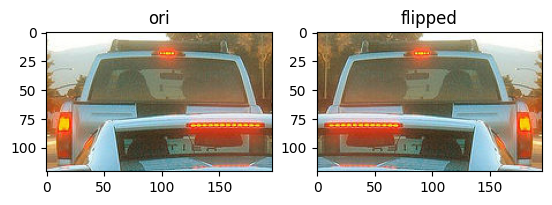

In [4]:
file_path=file_names[0]
ori_img=Image.open(file_path)

flip_transform=transforms.Compose([transforms.RandomHorizontalFlip(1.0)])

flipped_image=flip_transform(ori_img)

plt.subplot(121)
plt.imshow(ori_img)
plt.title('ori')

plt.subplot(122)
plt.imshow(flipped_image)
plt.title('flipped')

plt.show()

In [10]:
a=[i for i in range(6)]
print(random.sample(a,k=3))

[3, 0, 4]


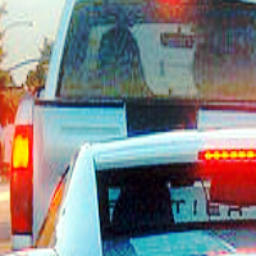

In [53]:
tf=transforms.Compose([transforms.Resize((256,256)),transforms.RandomCrop(200),transforms.RandomEqualize(),transforms.Resize((256,256))])
#tf=transforms.Resize((256,256))
display(tf(ori_img))

In [55]:
pre=transforms.Resize((256,256))
step1=transforms.RandomCrop((200,200))
step2=transforms.RandomEqualize()
step3=transforms.RandomHorizontalFlip(1.0)
post=transforms.Resize((256,256))

In [61]:
picture_num=len(file_names)
aug_imgs=[]
image=pre(ori_img)

aug_imgs.extend([step1(image) for _ in range(5)])

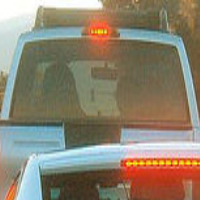

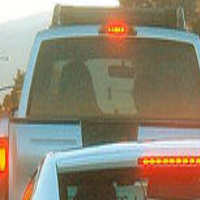

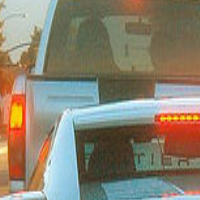

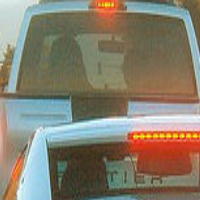

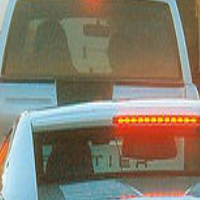

In [62]:
for i in aug_imgs:
    display(i)

In [63]:
aug_imgs.extend([step2(i) for i in aug_imgs])

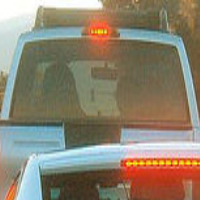

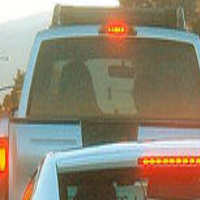

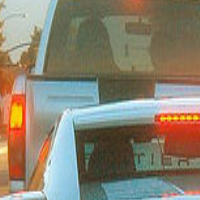

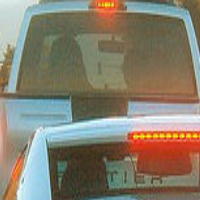

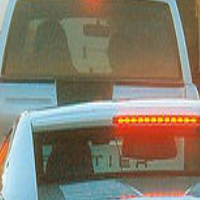

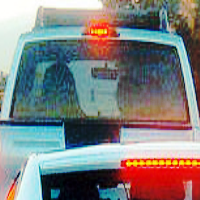

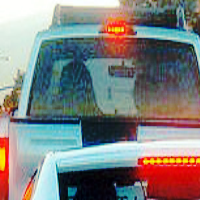

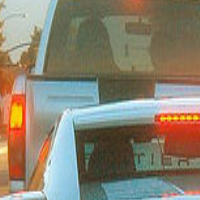

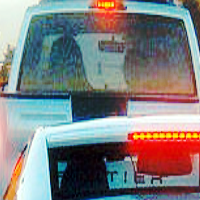

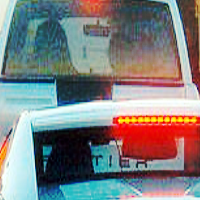

In [65]:
for i in aug_imgs:
    display(i)

In [66]:
aug_imgs.extend([step3(i) for i in aug_imgs])

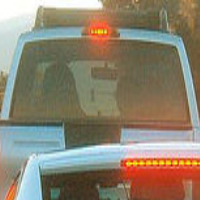

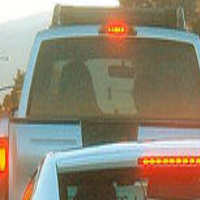

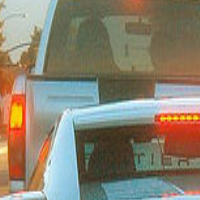

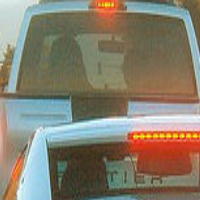

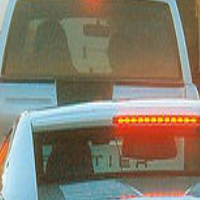

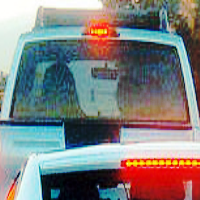

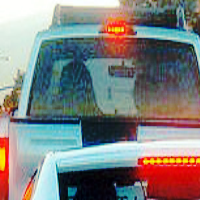

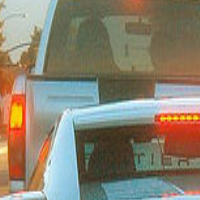

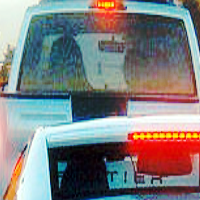

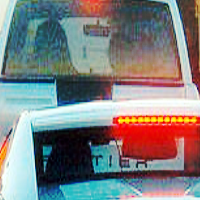

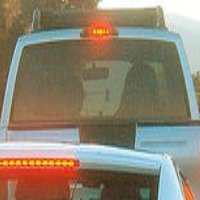

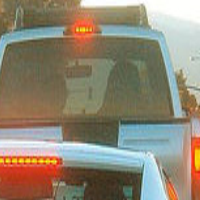

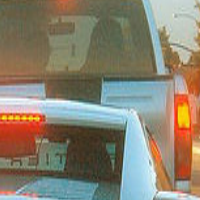

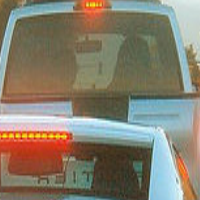

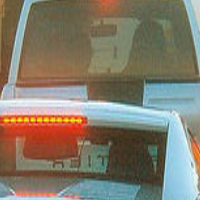

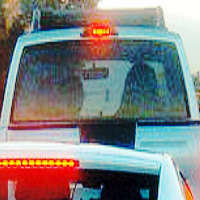

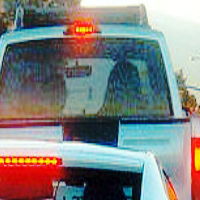

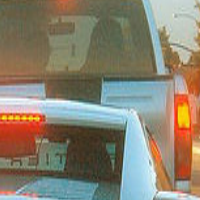

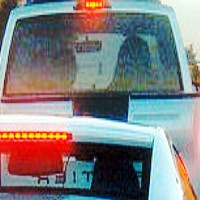

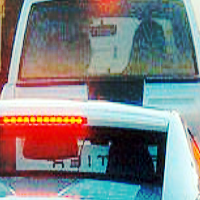

In [68]:
for i in aug_imgs:
    display(i)

In [69]:
aug_imgs=[post(i) for i in aug_imgs]

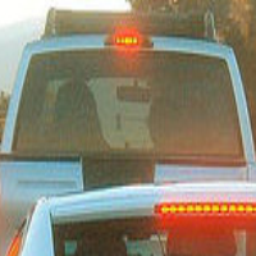

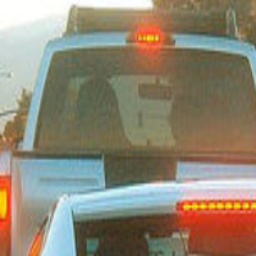

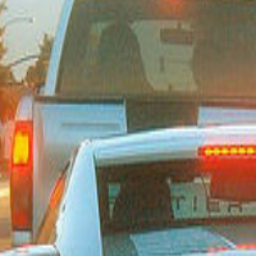

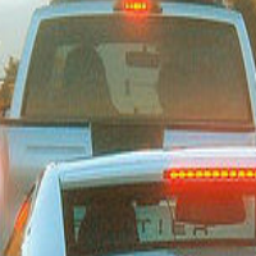

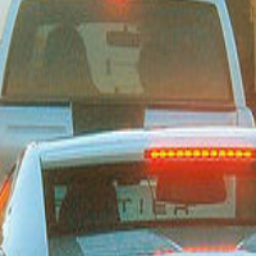

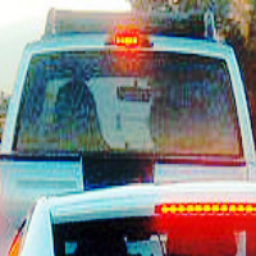

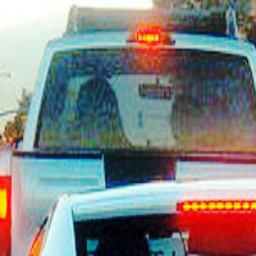

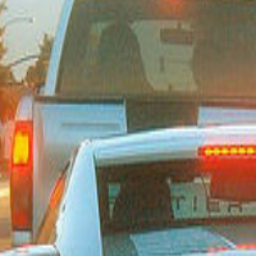

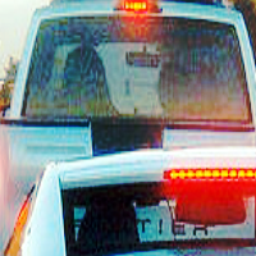

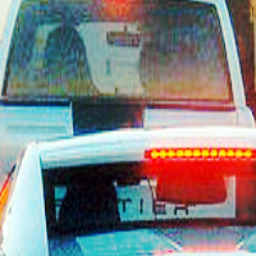

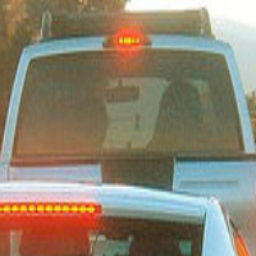

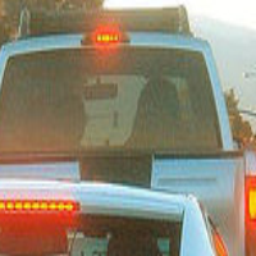

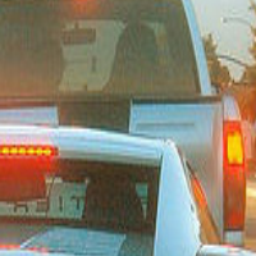

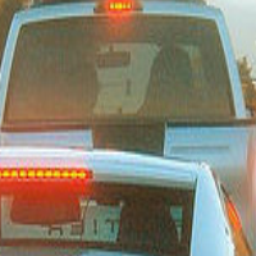

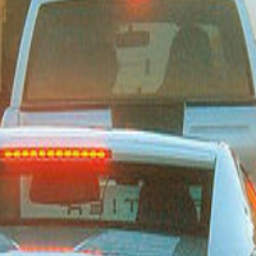

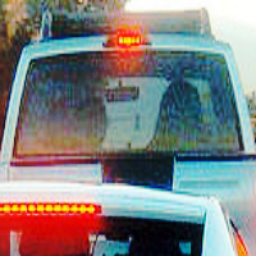

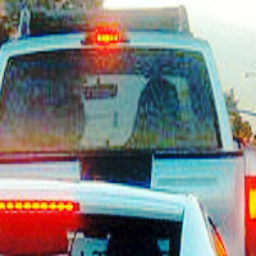

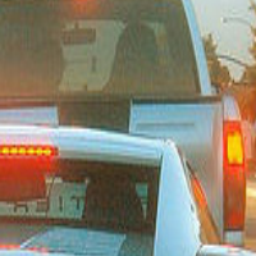

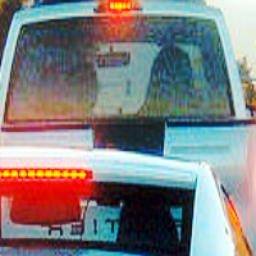

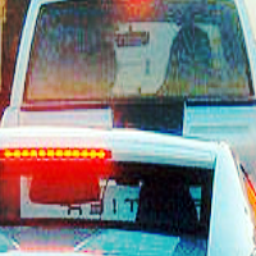

In [70]:
for i in aug_imgs:
    display(i)

In [71]:
for i,image in enumerate(aug_imgs):
    image.save(f'./sample/4_{str(i+1+picture_num)}.jpg')

In [73]:
pre=transforms.Resize((256,256))
step1=transforms.RandomCrop((200,200))
step2=transforms.RandomEqualize()
step3=transforms.RandomHorizontalFlip(1.0)
post=transforms.Resize((256,256))

In [80]:
folder_path = '../data/sub/car/back side'
file_names = glob.glob(folder_path+'/*')
picture_num=len(file_names)
print(f'増強前 : {picture_num}')
for file_path in file_names:
    ori_img=Image.open(file_path)
    aug_imgs=[]
    pre_image=pre(ori_img)

    aug_imgs.extend([step1(pre_image) for _ in range(1)])
    #aug_imgs.extend([step2(i) for i in aug_imgs])
    #aug_imgs.extend([step3(i) for i in aug_imgs])
    aug_imgs=[post(i) for i in aug_imgs]

    for j,image in enumerate(aug_imgs):
        now_pic_num=j+picture_num+1
        image.save(f'{folder_path}/3_{str(now_pic_num).zfill(3)}.jpg')
    picture_num=now_pic_num
af=glob.glob(folder_path+'/*')
print(f'増強後 : {len(af)}')

増強前 : 212
増強後 : 424


In [81]:
dis=['front','front side','side','back side','back']
for n in dis:
    af=glob.glob(f'../data/sub/car/{n}/*')
    print(f'{n} : {len(af)}')

front : 585
front side : 754
side : 485
back side : 424
back : 546
